In [ ]:
# CJE 1/10/2022  AAVSO Python for Timeseries analysis
# took a while to get this all set up, so missed some of the detail initially.  Got there eventually.

# need to run the following from the command line before running the jupyter notebook.  Not sure if this needs to 
# be done each time  
#   jupyter nbextension enable --py --sys-prefix qgrid
#   jupyter nbextension enable --py --sys-prefix widgetsnbextension
#   jupyter nbextension enable --py --sys-prefix ipympl

# then the normal
#   jupyter notebook

In [1]:
from Pyriod import Pyriod
import lightkurve as lk
%matplotlib widget

In [2]:
# use lightkurve to import the data (from where?)
lc = lk.search_lightcurve('SX Phe')[0].download().normalize()

In [3]:
#lightkurve dataset looks like this
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1354.1128804552739,9.6350265e-01,2.1737658e-04,4.6572308e-03,91190,756.72908,1150.41171,2.1258866e+05,4.9851276e+01,2.9694451e+03,8.4696665e+00,2.2885791e+05,5.1632812e+01,0,———,———,———,———,756.72908,2.0997404e-04,1150.41171,2.1261036e-04,-2.5773855e-02,7.3554315e-02
1354.1142693571198,9.5863289e-01,2.1693132e-04,4.6572443e-03,91191,756.71590,1150.42104,2.1168619e+05,4.9749161e+01,2.9782405e+03,8.4642067e+00,2.2770120e+05,5.1527050e+01,0,———,———,———,———,756.71590,2.1056320e-04,1150.42104,2.1319021e-04,-3.9510354e-02,8.3219022e-02
1354.1156582589658,9.6273464e-01,2.1665459e-04,4.6572578e-03,91192,756.72209,1150.43089,2.1113372e+05,4.9685699e+01,2.9770376e+03,8.4542751e+00,2.2867548e+05,5.1461319e+01,0,———,———,———,———,756.72209,2.1076818e-04,1150.43089,2.1351375e-04,-3.3401988e-02,9.3674436e-02
1354.1184360631212,9.6585107e-01,2.1673643e-04,4.6572853e-03,91194,756.72081,1150.43792,2.1126777e+05,4.9704468e+01,2.9750718e+03,8.4810619e+00,2.2941572e+05,5.1480759e+01,0,———,———,———,———,756.72081,2.1080025e-04,1150.43792,2.1404523e-04,-3.3940136e-02,1.0078926e-01
1354.1198249649672,9.5326459e-01,2.1717756e-04,4.6572988e-03,91195,756.71491,1150.41607,2.1215941e+05,4.9805626e+01,2.9685544e+03,8.4661922e+00,2.2642609e+05,5.1585537e+01,0,———,———,———,———,756.71491,2.1047694e-04,1150.41607,2.1310939e-04,-3.9844144e-02,7.6122314e-02
1354.1212138668132,9.6504611e-01,2.1786964e-04,4.6573123e-03,91196,756.71184,1150.42823,2.1363931e+05,4.9964344e+01,2.9584724e+03,8.4557257e+00,2.2922452e+05,5.1749928e+01,0,———,———,———,———,756.71184,2.0987137e-04,1150.42823,2.1227240e-04,-4.2772517e-02,8.8846870e-02
1354.1226027686587,9.7436053e-01,2.1916316e-04,4.6573258e-03,91197,756.71062,1150.42923,2.1625008e+05,5.0260994e+01,2.9771333e+03,8.4719954e+00,2.3143695e+05,5.2057171e+01,0,———,———,———,———,756.71062,2.0858868e-04,1150.42923,2.1112103e-04,-4.3742564e-02,8.9961633e-02
1354.1239916705038,9.9192697e-01,2.2090404e-04,4.6573393e-03,91198,756.71138,1150.43634,2.1988806e+05,5.0660229e+01,2.9730923e+03,8.4759483e+00,2.3560945e+05,5.2470676e+01,0,———,———,———,———,756.71138,2.0699728e-04,1150.43634,2.0946391e-04,-4.2476952e-02,9.6652210e-02


/home/john/miniconda3/envs/astro/lib/python3.10/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


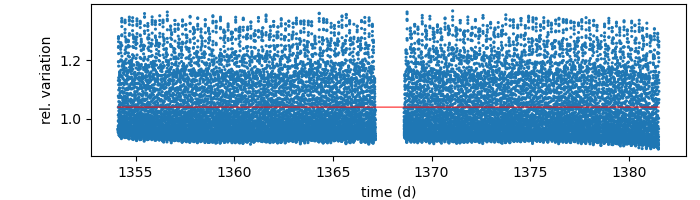

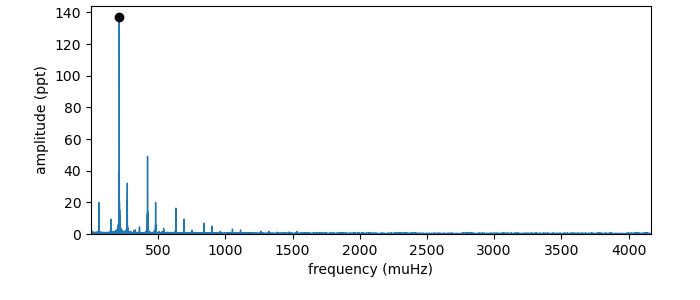

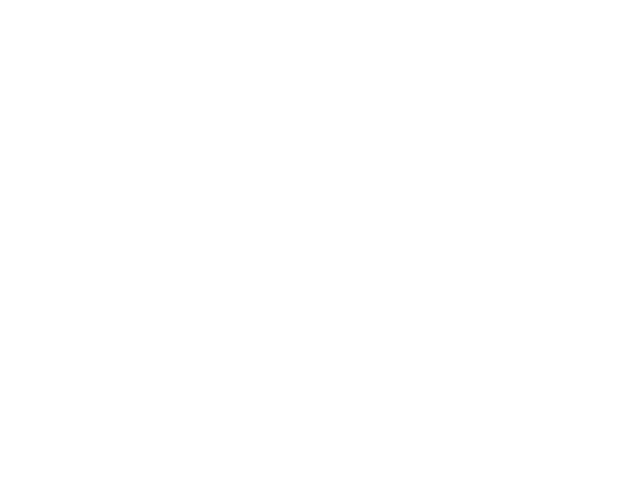

In [4]:
# pyriod is called by passing the lightkurve object
pyriod = Pyriod(lc)

In [5]:
# this call generates the pyriod window = which has timeseries, periodogram and can fit signal etc..
#  from the Signals tab, can add frequencies to the solution to 
pyriod.Pyriod()

In [12]:
# pandas version - not working, probably because of 'fainter than' non float values
import pandas as pd
dat = pd.read_csv('/home/john/astro/variable_star_data/aavsodata_txdra_20220904.csv')
time = dat["JD"]
mag = dat["Magnitude"]
mag2 = 10.0**(-0.4*dat["Magnitude"]) # fails, ?cos of non-floats
lc2 = lk.LightCurve(time=time,flux=mag2).normalize()

In [24]:
help(lk.LightCurve)

Help on class LightCurve in module lightkurve.lightcurve:

class LightCurve(astropy.timeseries.sampled.TimeSeries)
 |  LightCurve(data=None, *args, time=None, flux=None, flux_err=None, **kwargs)
 |  
 |  Subclass of AstroPy `~astropy.table.Table` guaranteed to have *time*, *flux*, and *flux_err* columns.
 |  
 |  Compared to the generic `~astropy.timeseries.TimeSeries` class, `LightCurve`
 |  ensures that each object has `time`, `flux`, and `flux_err` columns.
 |  These three columns are special for two reasons:
 |  1. they are the key columns upon which all light curve operations operate;
 |  2. they are always present (though they may be populated with ``NaN`` values).
 |  
 |  `LightCurve` objects also provide user-friendly attribute access to
 |  columns and meta data.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray, dict, list, `~astropy.table.Table`, or table-like object, optional
 |      Data to initialize time series. This does not need to contain the times
 |      

In [ ]:
# version from first aavso tutorial